In [2]:
from numpy import *

In [3]:
def matrixTolist(matrix):
    r = shape(matrix)[0]
    temp = array(matrix)
    templist = []
    for i in range(r):  # temp[i]是数组，tolist后变成列表
        templist.append(temp[i].tolist()[0])
    return templist

In [4]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()  # 两个都是字符串处理函数 lineArr为列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [5]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [6]:
def gradAscent(dataMatIn, classLabels, Cycles=500):
    deltalist = []
    dataMatrix = mat(dataMatIn)             # convert to NumPy matrix
    labelMat = mat(classLabels).transpose() # convert to NumPy matrix and transpose
    m, n = shape(dataMatrix)                # get row and clone
    alpha = 0.001                           # 步进值
    maxCycles = Cycles                         # 迭代次数限制
    weights = ones((n,1))                   # 矩阵  权重初始化
    for k in range(maxCycles):              # heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     # matrix mult
        error = (labelMat - h)              # vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error # book   
    return weights                          # 返回权重值

In [7]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()      # 获取数据集和类别标签
    dataArr = array(dataMat)
    n = shape(dataArr)[0]                  # 数据集的行数目
    xcord1 = []; ycord1 = []               # 一类的xy坐标
    xcord2 = []; ycord2 = []               # 另一类的xy坐标
    for i in range(n):
        if int(labelMat[i]) == 1:          # 如果该行数据属于第一类
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])  # 取出该行的xy值
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])  # 否则存储到另一类
    fig = plt.figure()
    ax = fig.add_subplot(111)   # 1行一列的第一个
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')  # 绘制1类散点图 s是标记的大小 scatter 是播撒的意思
    ax.scatter(xcord2, ycord2, s=30, c='green')            # 绘制2类散点图
    x = arange(-3.0, 3.0, 0.01)    # 600点
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');  
    plt.show()


[4.445582219045963, 0.5071199623298146, -0.6573892033139236]


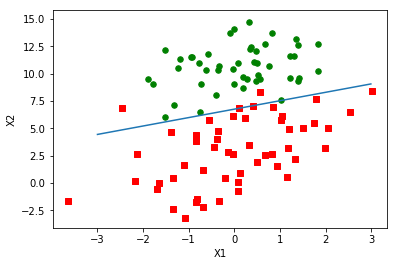

In [9]:
dataset, classlabel = loadDataSet()

weight = gradAscent(dataset, classlabel,600)   # 返回weight矩阵
weight = matrixTolist(weight)    # 返回weight矩阵
print(weight)

plotBestFit(weight)